### 목표
- sklearn에서 제공하는 iris활용하여 3가지 붓꽃 품종을 분류하는 모델을 만들어보자
- 딥러닝 신경망을 활용하여 다중분류 문제를 해결해보자

In [ ]:
# 환경 셋팅
# 필요한 도구 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 딥러닝 폴더 경로 이동
# cd
%cd 'drive/MyDrive/Colab Notebooks/23.12.18딥러닝'

/content/drive/MyDrive/Colab Notebooks/23.12.18딥러닝


In [ ]:
# 데이터 불러오기
iris_data= load_iris()
iris_data

# 번치 객체 (데이터의 묶음)
# 키값 확인
iris_data.keys()

# data문제(필수), 특성 ,X, feature , 설명변수, 독립변수
# target 답(필수), 타겟, y, 반응변수, 종속변수
# target_names 답 실제 이름(옵션)
# feature_names  특성 실제 이름(옵션)
# DESCR describe 설명문

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 특성 확인
iris_data.data

# 데이터 크기 확인 150//4
iris_data.data.shape

(150, 4)

In [ ]:
# 특성 이름
iris_data.feature_names

#['sepal length (cm)', 꽃받침 길이
# 'sepal width (cm)', 꽃받침 너비
# 'petal length (cm)', 꽃잎 길이
# 'petal width (cm)'] 꽃잎 너비


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
# 정답 데이터 확인
# 클래스가 몇개인지
# 각 클래스 안에는 몇개씩 들어가 있는지?
np.unique(iris_data.target)
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
np.unique(iris_data.target, return_counts=True)

# pandas 데이터 그룹별 개수를 세어주는 함수 : 판다스데이터.values_counts()

target_s=pd.Series(iris_data.target)
print(target_s.unique())
print(target_s.value_counts())


[0 1 2]
0    50
1    50
2    50
dtype: int64


In [ ]:
# 답 데이터 전처리:
# 답 데이터가 원핫 인코딩 상태여야 예측 오차 계산 가능
# pd.get_dummies(대상)
y_oh= pd.get_dummies(iris_data.target)
y_oh

# 텐서플로우 원핫 인코딩 to_categorical(대상):2차원 array
from tensorflow.keras.utils import to_categorical
to_categorical(iris_data.target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_data.data, y_oh, test_size=0.3,random_state=7)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape
# 모델에 입력되는 특성의 개수 : 4
# 출력층 뉴런(유닛, 퍼셉트론)의 개수 : 클래스의 수 (3)

((105, 4), (45, 4), (105, 3), (45, 3))

#### 신경망 설계
- 1. 신경망 구축(뼈대, 층 내용)
- 2. 신경망 컴파일(compile)
- 3. 신경망 학습(fit) 및 학습현황 시각화(추이 선 그래프)
- 4. 신경망 예측 및 평가

In [ ]:
iris_model=Sequential() # 뼈대구축
# 입력층 + 중간층1
# 유닛 8  // input_dim //
iris_model.add(Dense(units=8,input_dim=4,activation='relu'))

# 중간층(은닉충)
iris_model.add(Dense(units=4,activation='relu'))

# 출력층
# 다중분류 units: 클래스의 수
# 활성화 함수:softmax
iris_model.add(Dense(units=3,activation='softmax'))


# 모델 정보 요약
iris_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 컴파일
# compile
# loss 손실함수 (비용함수)
# - 회귀 : mse
# - 이진 : binary_crossentropy
# - 다중 : categorical_crossentropy
# optimizer : 최적화 함수 (더 좋은 w,b를 찾는 방법들 : 경사하강법 종류,,)
# - sgd,rmprop,adam...
# metircs 평가 함수(평가지표)
# - 회귀 : 설정 x (loss오차값을 평가지표)
# - 분류 : accuracy(정확도)

iris_model.compile(loss="categorical_crossentropy",
                       optimizer='adam',
                       metrics=['accuracy']
)

In [ ]:
# 학습
# 반복횟수 200, batch_size=10
# 학습현황 h변수 담기
h=iris_model.fit(X_train,y_train,epochs=200,batch_size=10)

# epochs : 학습 횟수(몇 번 학습을 반복할 것인가?)
#    - epochs 가 너무 적으면 학습이 안되거나 과소적합이 생길 수 있음
#    - epochs 가 너무 크면 과대적합(과적합)에 걸릴 수 있음
#    - 데이터가 많고 전처리가 덜 되어 있으면 epochs를 크게 잡음
#    - 데이터가 적고 전처리가 잘 되어 있으면 epochs를 작게 잡아도 됨
# batch_size : 샘플의 수 (반복할 때 몇개 데이터를 이용해서 학습할 것인가)
# batch_size의 크기는 사용할 메모리에 따라 달라질 수 있음 , 데이터의 크기에 따라 달라질 수 있음

Epoch 1/200
11/11 [==============================] - 1s 6ms/step - loss: 2.8825 - accuracy: 0.3143
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 2.2755 - accuracy: 0.3143
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 1.7833 - accuracy: 0.3143
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 1.5258 - accuracy: 0.2857
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 1.3924 - accuracy: 0.0952
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 1.3106 - accuracy: 0.0000e+00
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 1.2280 - accuracy: 0.1143
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 1.1619 - accuracy: 0.2857
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 1.1182 - accuracy: 0.3333
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 1.0796 - accuracy: 0.3619
Epoch

In [ ]:
h.history.keys()

dict_keys(['loss', 'accuracy'])

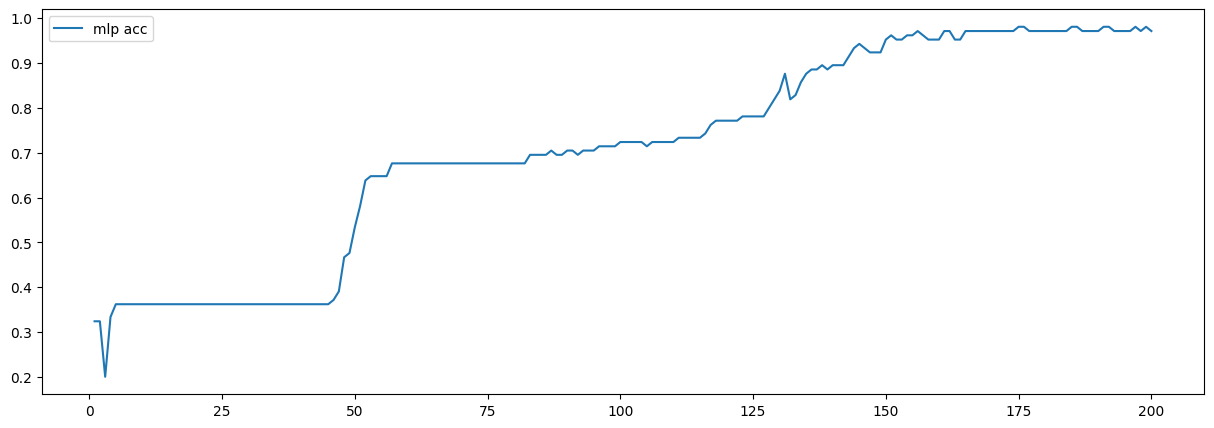

In [ ]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(range(1,201),h.history['accuracy'],label='mlp acc')
plt.legend()
plt.show()